In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
import ROOT
import datetime
from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
from scipy.misc import factorial


Welcome to JupyROOT 6.10/04


In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
from decode_new import GetWaveformsNoiseRemoval
from decode_new import GetWaveforms

In [4]:
from datetime import datetime

In [5]:
def gettime(name):
    date = name.split('PrM1-')[-1].split('.dat')[0]
    time = datetime.strptime(date,'%Y_%m_%d-%H_%M_%S')
    return time

In [6]:
def QaQc(wf_v):
    anode_v = wf_v[0][700:]
    cathode_v = wf_v[1][500:]
    Qa = np.amax(anode_v)
    Qc = np.amin(cathode_v)
    return Qa,Qc

def QaQcSTATS(ev_wf_v):
    
    Qa_v = []
    Qc_v = []
    for wf_v in ev_wf_v:
        Qa,Qc = QaQc(wf_v)
        Qa_v.append(Qa*1e3)
        Qc_v.append(Qc*1e3)
    Qa_v = np.array(Qa_v)
    Qc_v = np.array(Qc_v)

    Qa_avg = np.mean(Qa_v)
    Qa_rms = np.std(Qa_v)
    Qc_avg = np.mean(Qc_v)
    Qc_rms = np.std(Qc_v)
    
    return [[Qa_avg,Qa_rms],[Qc_avg,Qc_rms]]

In [7]:
#PATH = '/home/david/data/PrM/Gas07psi_092718/'
#PATH = '/home/david/data/PrM/7psi/data7psi/data/'
#PATH = '/home/david/data/PrM/Run2Liquid/Liquid/VC100_VCG65/measures/'

#PATH = '/home/david/data/LArCADeGAS2019/2PSI/'
PATH = '/home/david/data/LArCADe2021/'


datafile_v = os.listdir(PATH)
dt = 0.0005

In [8]:
VOLTAGEMAP = {}
VOLTAGEMAP['PrM1-2021_08_11-12_30_11.dat'] = 6000
VOLTAGEMAP['PrM1-2021_08_11-12_33_48.dat'] = 6000

VOLTAGEMAP['PrM1-2021_08_11-12_37_34.dat'] = 5000
VOLTAGEMAP['PrM1-2021_08_11-12_38_53.dat'] = 5000

VOLTAGEMAP['PrM1-2021_08_11-12_40_21.dat'] = 4000
VOLTAGEMAP['PrM1-2021_08_11-12_41_38.dat'] = 4000

VOLTAGEMAP['PrM1-2021_08_11-12_44_24.dat'] = 3000
VOLTAGEMAP['PrM1-2021_08_11-12_46_02.dat'] = 3000

VOLTAGEMAP['PrM1-2021_08_11-12_47_45.dat'] = 2000
VOLTAGEMAP['PrM1-2021_08_11-12_49_24.dat'] = 2000

VOLTAGEMAP['PrM1-2021_08_11-12_51_00.dat'] = 1000
VOLTAGEMAP['PrM1-2021_08_11-12_52_19.dat'] = 1000

VOLTAGEMAP['PrM1-2021_08_11-12_53_39.dat'] = 900
VOLTAGEMAP['PrM1-2021_08_11-12_54_41.dat'] = 900

VOLTAGEMAP['PrM1-2021_08_11-12_55_49.dat'] = 800
VOLTAGEMAP['PrM1-2021_08_11-12_56_46.dat'] = 800

VOLTAGEMAP['PrM1-2021_08_11-12_57_54.dat'] = 700
VOLTAGEMAP['PrM1-2021_08_11-12_58_52.dat'] = 700

VOLTAGEMAP['PrM1-2021_08_11-12_59_58.dat'] = 600
VOLTAGEMAP['PrM1-2021_08_11-13_00_57.dat'] = 600

VOLTAGEMAP['PrM1-2021_08_11-13_02_22.dat'] = 500
VOLTAGEMAP['PrM1-2021_08_11-13_03_26.dat'] = 500

In [9]:
VOLTAGE_LIST_V = [500,600,700,800,900,1000,2000,3000,4000,5000,6000]

In [10]:
def getDataFile(date):
    found = False
    for i,datafile in enumerate(datafile_v):
        if (datafile.find(date) >= 0):
            return i
    return None

In [11]:
for i,datafile in enumerate(datafile_v):
    print '%i -> %s'%(i,datafile)

0 -> PrM1-2021_08_11-13_00_57.dat
1 -> PrM1-2021_08_11-12_59_58.dat
2 -> PrM1-2021_08_11-12_58_52.dat
3 -> PrM1-2021_08_11-13_05_39.dat
4 -> PrM1-2021_08_11-12_41_38.dat
5 -> PrM1-2021_08_11-12_33_48.dat
6 -> PrM1-2021_08_11-12_52_19.dat
7 -> PrM1-2021_08_11-13_08_38.dat
8 -> PrM1-2021_08_11-12_53_39.dat
9 -> PrM1-2021_08_11-12_54_41.dat
10 -> PrM1-2021_08_11-12_38_53.dat
11 -> LArCADe data.zip
12 -> PrM1-2021_08_11-12_46_02.dat
13 -> PrM1-2021_08_11-12_37_34.dat
14 -> PrM1-2021_08_11-13_03_26.dat
15 -> PrM1-2021_08_11-12_44_24.dat
16 -> PrM1-2021_08_11-12_55_49.dat
17 -> PrM1-2021_08_11-12_30_11.dat
18 -> PrM1-2021_08_11-12_25_22.dat
19 -> PrM1-2021_08_11-12_57_54.dat
20 -> PrM1-2021_08_11-12_56_46.dat
21 -> PrM1-2021_08_11-12_21_37.dat
22 -> PrM1-2021_08_11-12_47_45.dat
23 -> PrM1-2021_08_11-13_02_22.dat
24 -> PrM1-2021_08_11-12_51_00.dat
25 -> PrM1-2021_08_11-13_04_43.dat
26 -> PrM1-2021_08_11-12_49_24.dat
27 -> PrM1-2021_08_11-12_40_21.dat
28 -> PrM1-2021_08_11-13_07_44.dat
29 -> L

In [12]:
date = '12_38_53'
nfile = getDataFile(date)
if (nfile != None):
    datafile = PATH + datafile_v[nfile]
    print datafile
    ev_wf_v = GetWaveformsNoiseRemoval(datafile)
else:
    print 'no input file found!'

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_38_53.dat
dt is  0.0005


In [13]:
time_v = np.linspace(0,dt*len(ev_wf_v[0][0]),len(ev_wf_v[0][0]))

In [14]:
avg_A_wf_v = np.zeros(len(time_v))
avg_C_wf_v = np.zeros(len(time_v))
for n in xrange(len(ev_wf_v)):
    avg_A_wf_v += ev_wf_v[n][0]
    avg_C_wf_v += ev_wf_v[n][1]
avg_A_wf_v /= len(ev_wf_v)
avg_C_wf_v /= len(ev_wf_v)

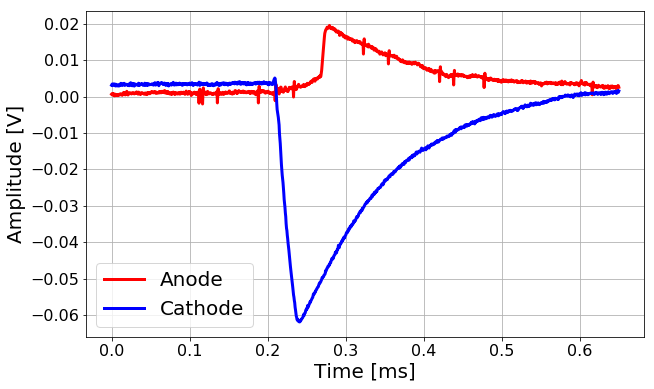

In [15]:
fig = plt.figure(figsize=(10,6))
plt.plot(time_v,avg_A_wf_v,color='r',label='Anode',lw=3)
plt.plot(time_v,avg_C_wf_v,color='b',label='Cathode',lw=3)
plt.grid()
plt.legend(fontsize=20)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Amplitude [V]',fontsize=20)
#plt.title('Run in Liquid @ 1 kV',fontsize=20)
#plt.ylim([-0.025,0.025])
#plt.xlim([0.1,1.3])

plt.show()

# Waveform by waveform

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_33_48.dat
dt is  0.0005


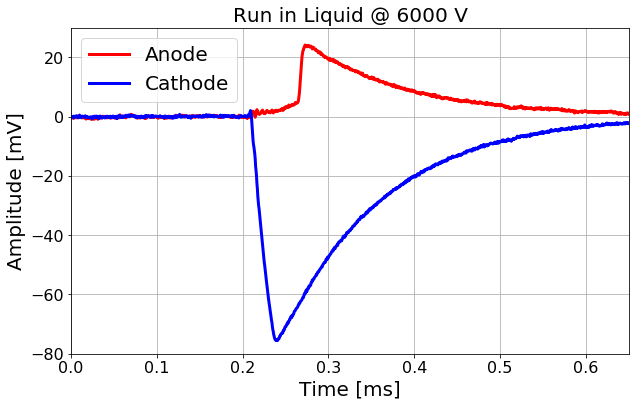

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_47_45.dat
dt is  0.0005


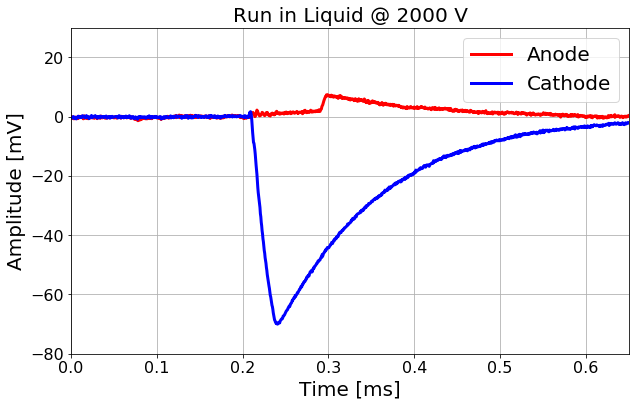

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_37_34.dat
dt is  0.0005


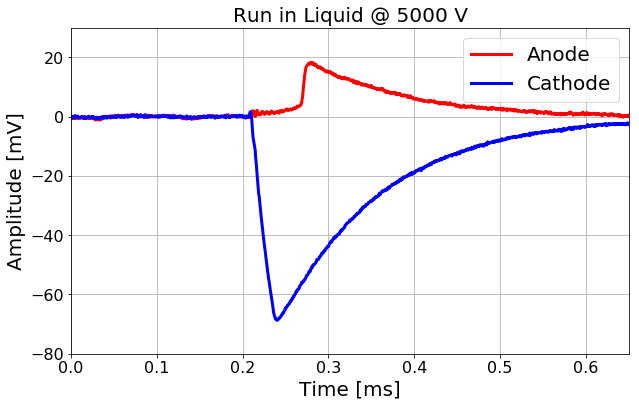

/home/david/data/LArCADe2021/PrM1-2021_08_11-13_00_57.dat
dt is  0.0005


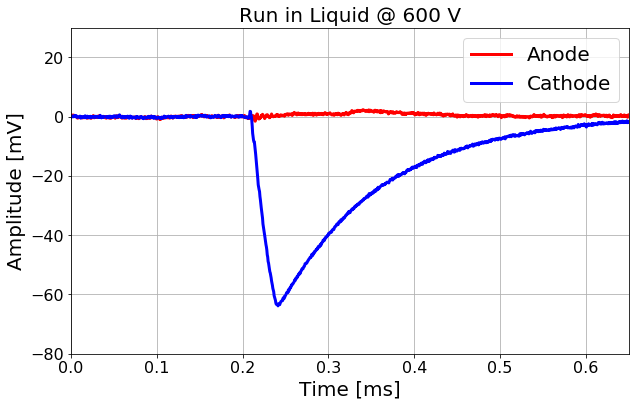

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_57_54.dat
dt is  0.0005


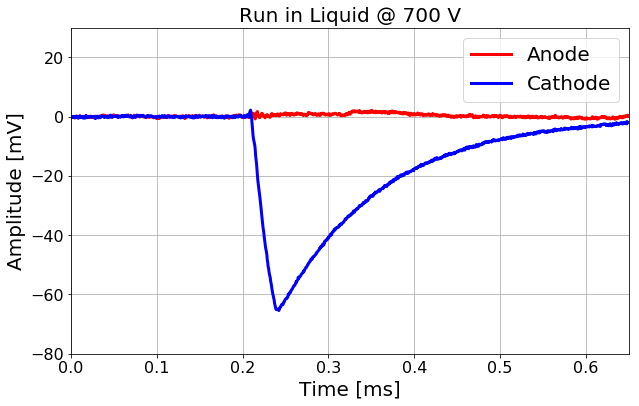

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_46_02.dat
dt is  0.0005


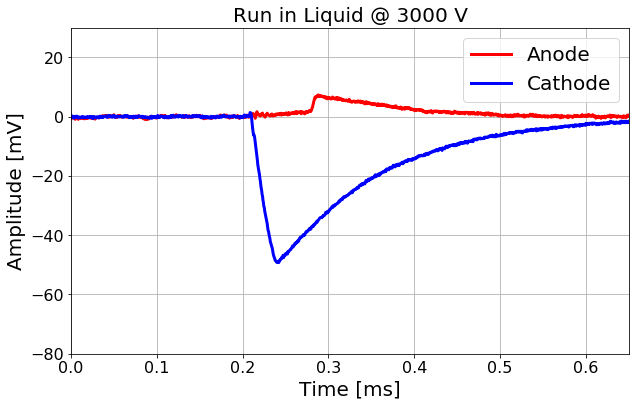

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_54_41.dat
dt is  0.0005


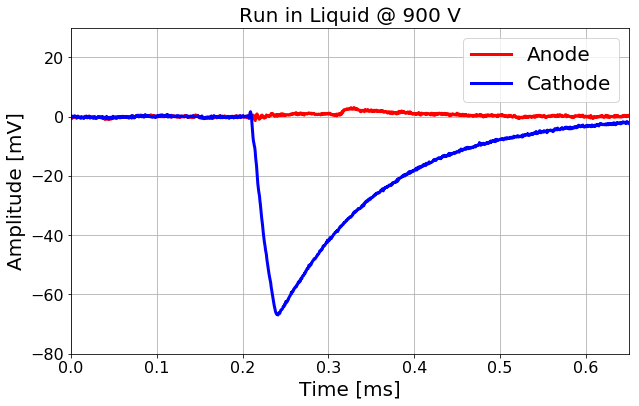

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_55_49.dat
dt is  0.0005


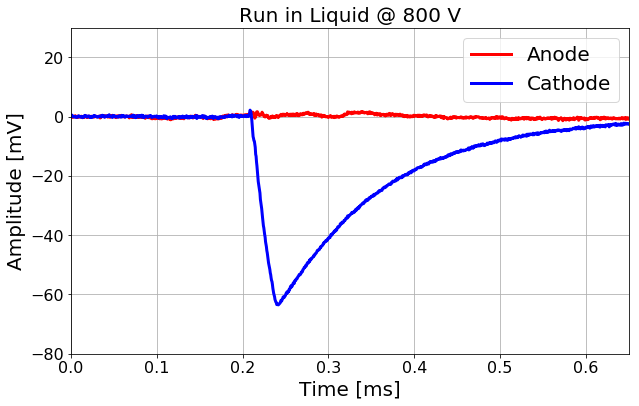

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_56_46.dat
dt is  0.0005


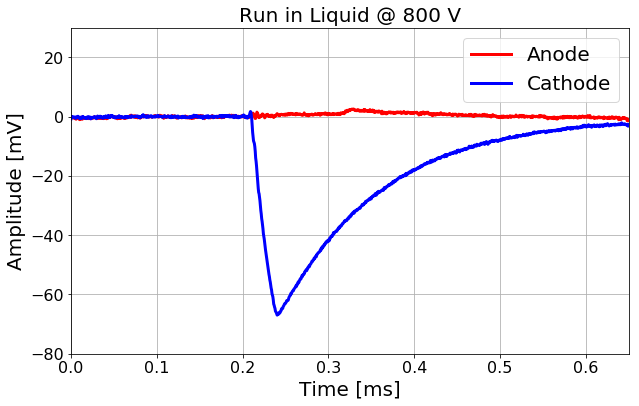

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_49_24.dat
dt is  0.0005


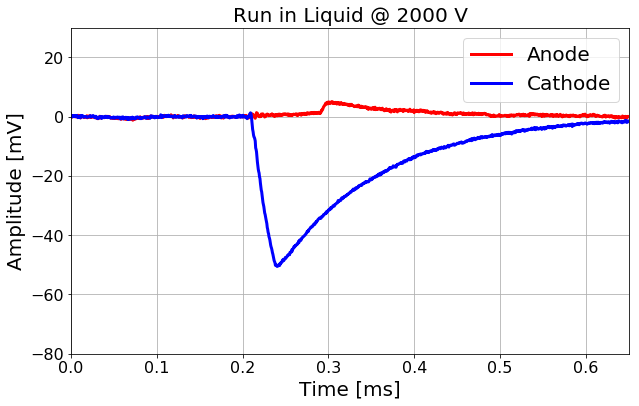

/home/david/data/LArCADe2021/PrM1-2021_08_11-13_02_22.dat
dt is  0.0005


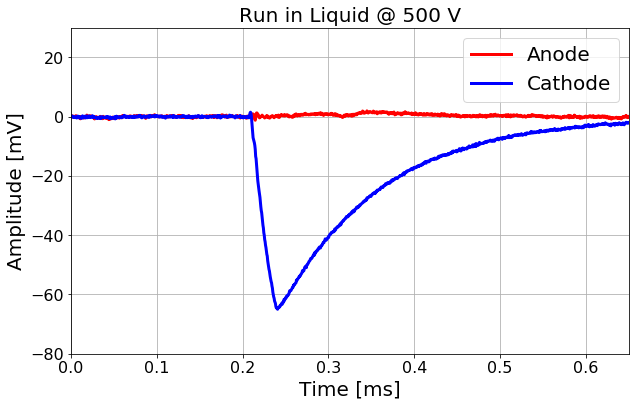

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_40_21.dat
dt is  0.0005


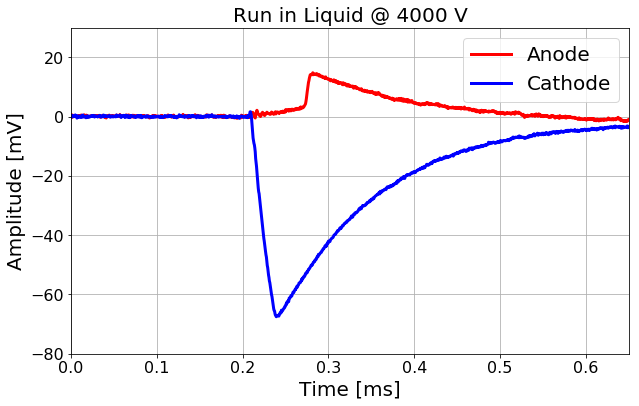

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_52_19.dat
dt is  0.0005


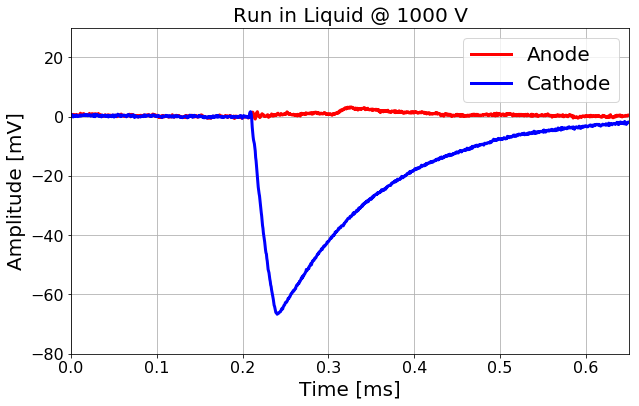

/home/david/data/LArCADe2021/PrM1-2021_08_11-13_03_26.dat
dt is  0.0005


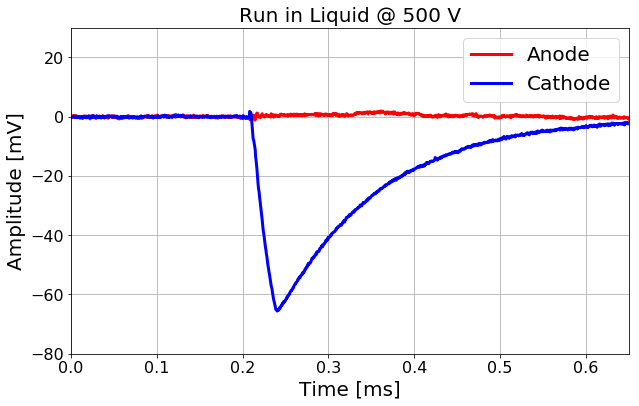

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_44_24.dat
dt is  0.0005


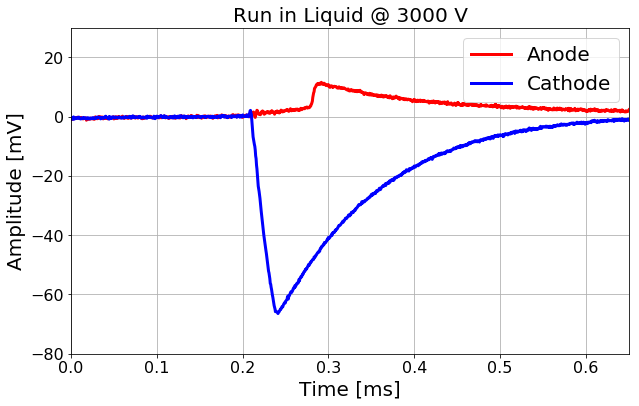

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_30_11.dat
dt is  0.0005


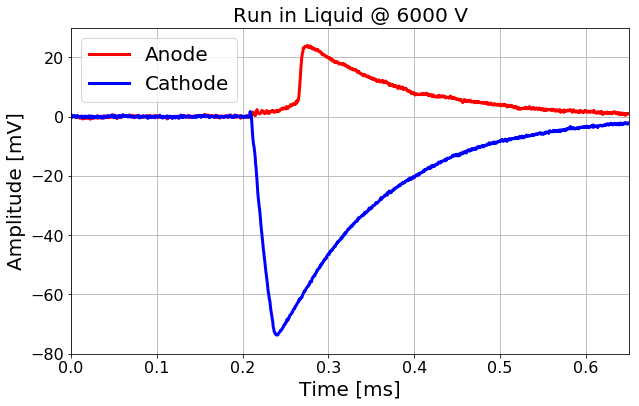

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_38_53.dat
dt is  0.0005


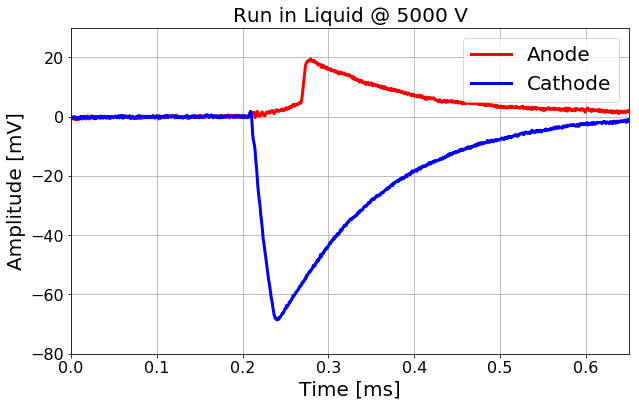

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_41_38.dat
dt is  0.0005


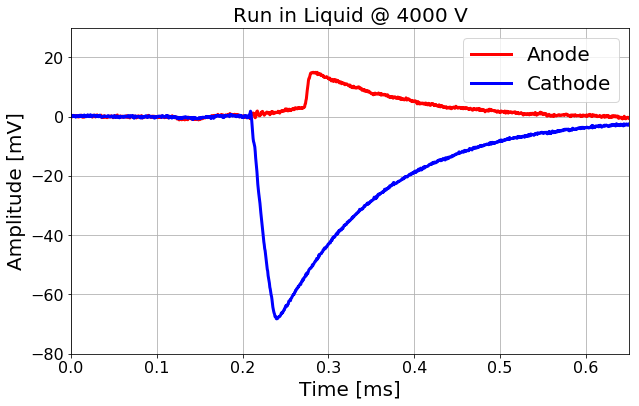

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_59_58.dat
dt is  0.0005


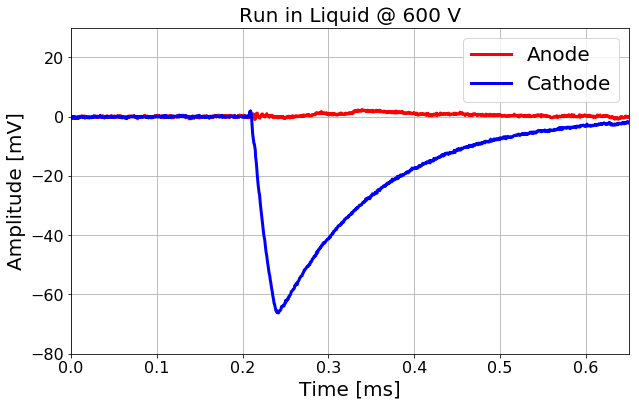

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_53_39.dat
dt is  0.0005


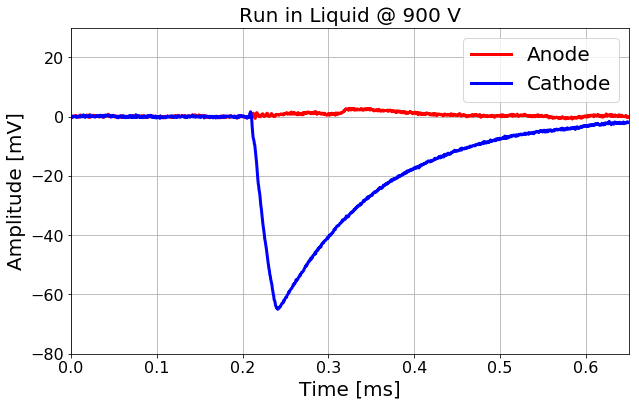

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_51_00.dat
dt is  0.0005


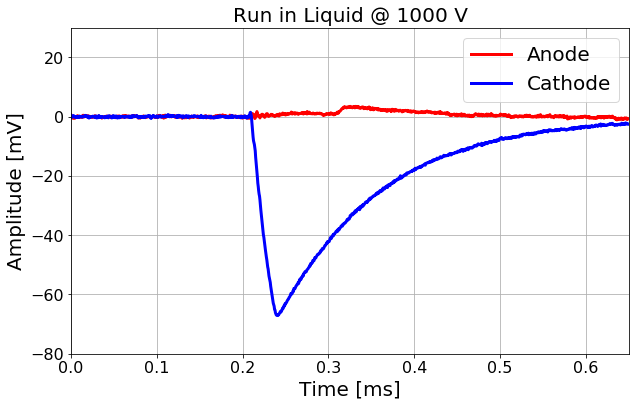

/home/david/data/LArCADe2021/PrM1-2021_08_11-12_58_52.dat
dt is  0.0005


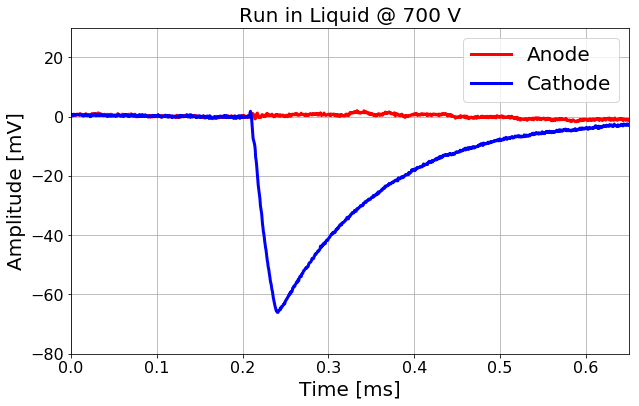

In [16]:
dt = 0.0005

Tmin = 0.1# ms
Tmax = 0.6 # ms

BaselineRange1 = [0.10,0.15]
BaselineRange2 = [0.18,0.20]

IntegrationRange = [0.2,0.6]

B1Tmin = int(BaselineRange1[0]/dt)
B1Tmax = int(BaselineRange1[1]/dt)

B2Tmin = int(BaselineRange2[0]/dt)
B2Tmax = int(BaselineRange2[1]/dt)

IntMin = int(IntegrationRange[0]/dt)
IntMax = int(IntegrationRange[1]/dt)

ALL_AVG_C_WF_V = []
ALL_AVG_A_WF_V = []
AVG_A_MAX_V = []
AVG_C_MIN_V = []
VOLTAGE_V = []

#fig = plt.figure(figsize=(8,6))

for date,voltage in VOLTAGEMAP.iteritems():
    
    VOLTAGE_V.append(voltage)
    
    nfile = getDataFile(date)
    if (nfile != None):
        datafile = PATH + datafile_v[nfile]
        print datafile
        ev_wf_v = GetWaveformsNoiseRemoval(datafile)
        #ev_wf_v = GetWaveforms(datafile)
    else:
        print 'no input file found!'
        
    time_v = np.linspace(0,dt*len(ev_wf_v[0][0]),len(ev_wf_v[0][0]))
    
    avg_A_wf_v = np.zeros(len(time_v))
    avg_C_wf_v = np.zeros(len(time_v))
    #for n in xrange(len(ev_wf_v)):
    #    avg_A_wf_v += ev_wf_v[n][0]
    #    avg_C_wf_v += ev_wf_v[n][1]
    #avg_A_wf_v /= len(ev_wf_v)
    #avg_C_wf_v /= len(ev_wf_v)
    
    
    ANODE_MAX_V = []
    CATHODE_MAX_V = []
    
    # used waveforms
    NWFS = 0
    
    for n in xrange(len(ev_wf_v)):
        
        cathode_wf = 1e3 * ev_wf_v[n][1]
        anode_wf   = 1e3 * ev_wf_v[n][0]
        
        # compute baselines
        B1C = np.mean(cathode_wf[B1Tmin:B1Tmax])
        B2C = np.mean(cathode_wf[B2Tmin:B2Tmax])
        B1A = np.mean(anode_wf[B1Tmin:B1Tmax])
        B2A = np.mean(anode_wf[B2Tmin:B2Tmax])
        #print (r'baseline C1 : %.02f C2 : %.02f A1 : %.02f A2 : %.02f [$\mu$ V]'%(B1C,B2C,B1A,B2A))
        
        BC = 0.5*(B1C+B2C)
        BA = 0.5*(B1A+B2A)
        
        cathode_wf -= BC
        anode_wf   -= BA
        
        AMAX = np.max(anode_wf)
        ANODE_MAX_V.append(AMAX)
        
        CMAX = np.max(cathode_wf)
        CATHODE_MAX_V.append(CMAX)
        
        # skip noise
        if (AMAX > 50): continue
        
        # save avg wf
        avg_A_wf_v += anode_wf
        avg_C_wf_v += cathode_wf
        NWFS += 1
        
        '''
        fig = plt.figure(figsize=(10,6))
        plt.plot(time_v,anode_wf,color='r',label='Anode',lw=1,alpha=0.5)
        plt.plot(time_v,cathode_wf,color='b',label='Cathode',lw=1,alpha=0.5)
        plt.grid()
        #plt.legend(fontsize=20)
        plt.xlabel('Time [ms]',fontsize=20)
        plt.ylabel('Amplitude [mV]',fontsize=20)
        plt.title('Run in Liquid @ %i V'%voltage,fontsize=20)
        plt.xlim([0,0.75])
        plt.ylim([-100,100])
        plt.show()
        '''
        
        #if (n > 50):
        #    break
       
    avg_A_wf_v /= NWFS
    avg_C_wf_v /= NWFS
    
    ALL_AVG_C_WF_V.append(avg_C_wf_v)
    ALL_AVG_A_WF_V.append(avg_A_wf_v)
    #TIME_V.append
    
    AVG_A_MAX_V.append(np.max(avg_A_wf_v))
    AVG_C_MIN_V.append(np.min(avg_C_wf_v))
    
    fig = plt.figure(figsize=(10,6))
    plt.plot(time_v,avg_A_wf_v,color='r',label='Anode',lw=3,alpha=1)
    plt.plot(time_v,avg_C_wf_v,color='b',label='Cathode',lw=3,alpha=1)
    plt.grid()
    plt.legend(fontsize=20)
    plt.xlabel('Time [ms]',fontsize=20)
    plt.ylabel('Amplitude [mV]',fontsize=20)
    plt.title('Run in Liquid @ %i V'%voltage,fontsize=20)
    plt.savefig('/home/david/Neutrinos/LArCADe/Analysis/2021/avg_%iv.pdf'%voltage,dpi=250)
    plt.xlim([0,0.65])
    plt.ylim([-80,30])
    plt.show()
    
    #plt.hist(ANODE_MAX_V,bins=np.linspace(0,100,100),histtype='step',lw=2,label='%i V'%voltage)
    #plt.hist(CATHODE_MAX_V,bins=np.linspace(0,100,100),histtype='step',lw=2,label='%i V'%voltage)
#plt.title('voltage : %i'%voltage)
#plt.xlabel('max anode amplitude [mV]')
#plt.legend(loc=1,fontsize=10)
#plt.show()
        
#break

In [17]:
COLORMAP = {}
COLORMAP[6000] = 'k'
COLORMAP[5000] = 'b'
COLORMAP[4000] = 'r'
COLORMAP[3000] = 'orange'
COLORMAP[2000] = 'c'
COLORMAP[1000] = 'gray'
COLORMAP[900] = 'yellow'
COLORMAP[800] = 'green'
COLORMAP[700] = 'coral'
COLORMAP[600] = 'olive'
COLORMAP[500] = 'salmon'

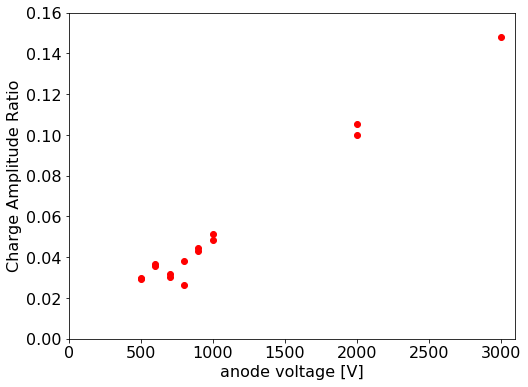

In [18]:
AMPL_RATIO_V = -np.array(AVG_A_MAX_V)/np.array(AVG_C_MIN_V)

fig = plt.figure(figsize=(8,6))
plt.plot(VOLTAGE_V,AMPL_RATIO_V,'ro')
plt.xlabel('anode voltage [V]')
plt.ylabel('Charge Amplitude Ratio')
plt.xlim([0,3100])
plt.ylim([0,0.16])
plt.savefig('/home/david/Neutrinos/LArCADe/Analysis/2021/charge_ampl_ratio_zoom.pdf',dpi=250)
plt.show()

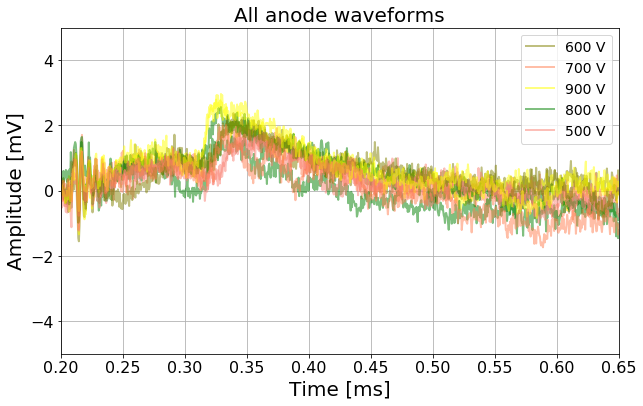

In [19]:
USEDMAP = {}

fig = plt.figure(figsize=(10,6))
for i,voltage in enumerate(VOLTAGE_V):
    if (voltage >= 1000): continue
    if (voltage in USEDMAP.keys()):
        plt.plot(time_v,ALL_AVG_A_WF_V[i],lw=2,alpha=0.5,color=COLORMAP[voltage])
    else:
        plt.plot(time_v,ALL_AVG_A_WF_V[i],lw=2,alpha=0.5,color=COLORMAP[voltage],label='%i V'%voltage)
    USEDMAP[voltage] = 1
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Amplitude [mV]',fontsize=20)
plt.title('All anode waveforms',fontsize=20)
plt.xlim([0.2,0.65])
plt.ylim([-5,5])
#plt.ylim([-80,10])
plt.show()

In [21]:
def diffwf(wf):
    wfdiff = np.zeros(len(wf))
    for n in range(2,len(wf)-3):
        wfdiff[n] = (wf[n+2] - wf[n-2])/5.
    return wfdiff

getting started...
iteratio 0 with voltage 6000
('here voltage is ', 6000)


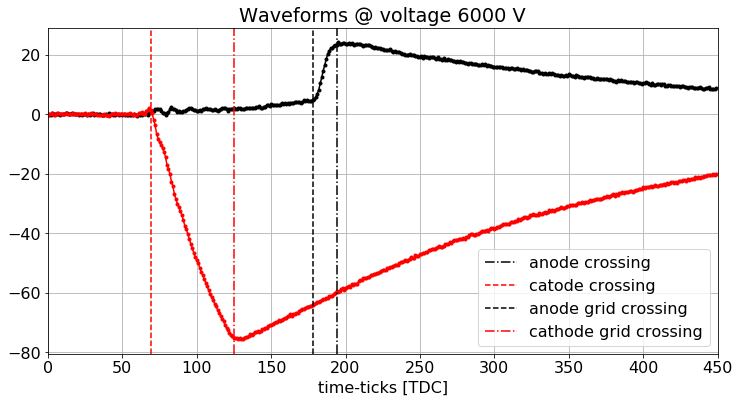

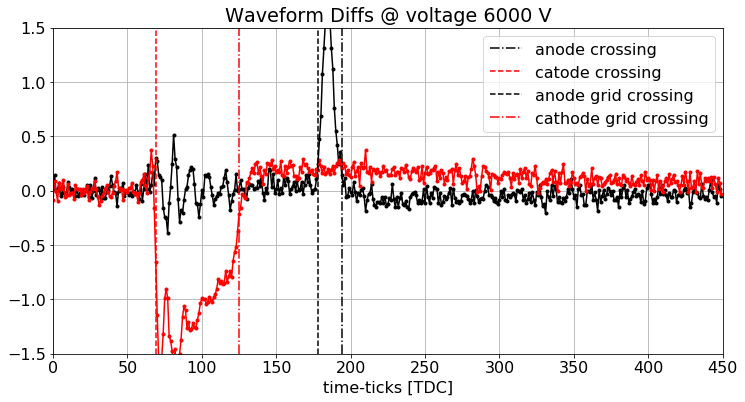

iteratio 1 with voltage 2000
('here voltage is ', 2000)


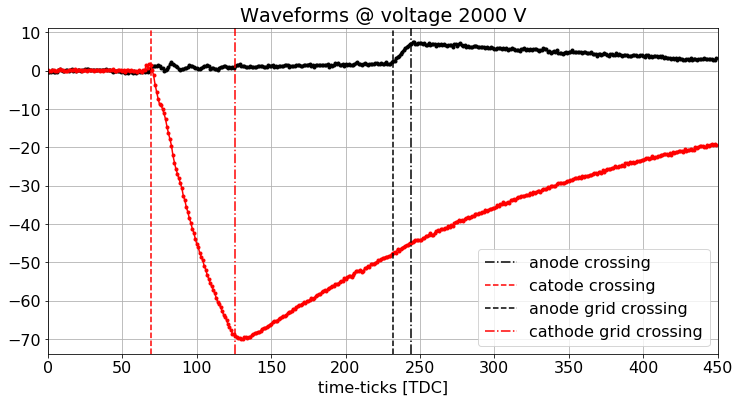

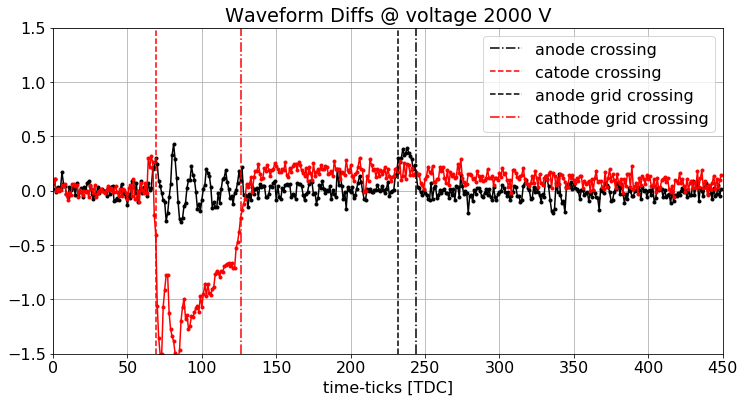

iteratio 2 with voltage 5000
('here voltage is ', 5000)


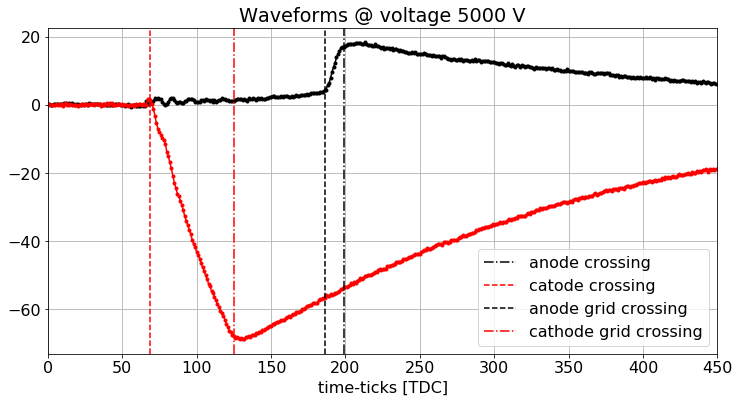

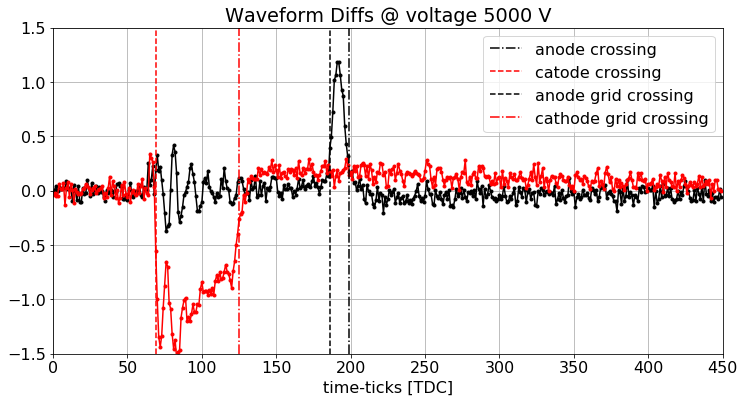

iteratio 3 with voltage 600
('here voltage is ', 600)


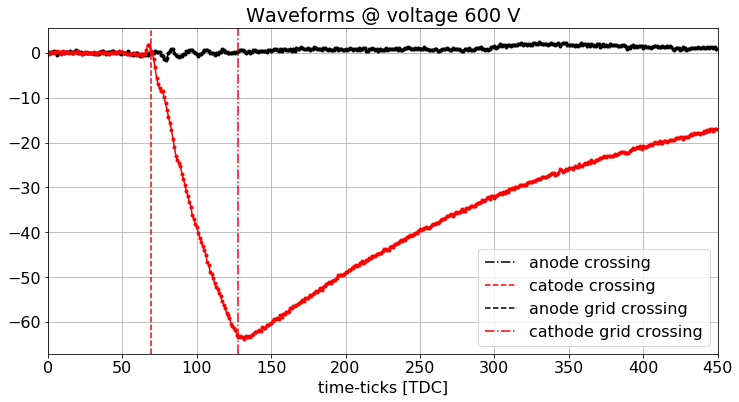

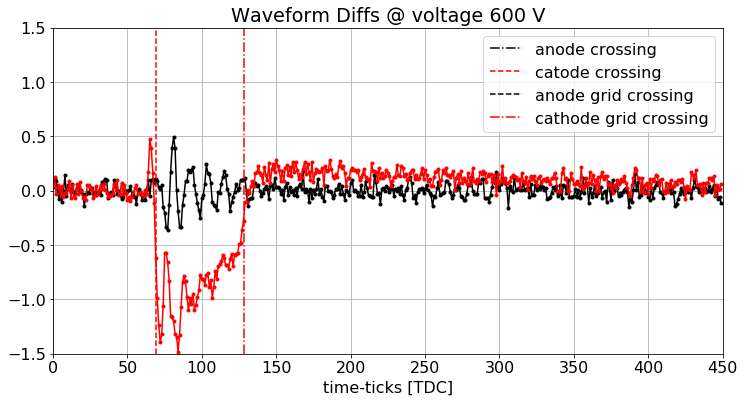

iteratio 4 with voltage 700
('here voltage is ', 700)


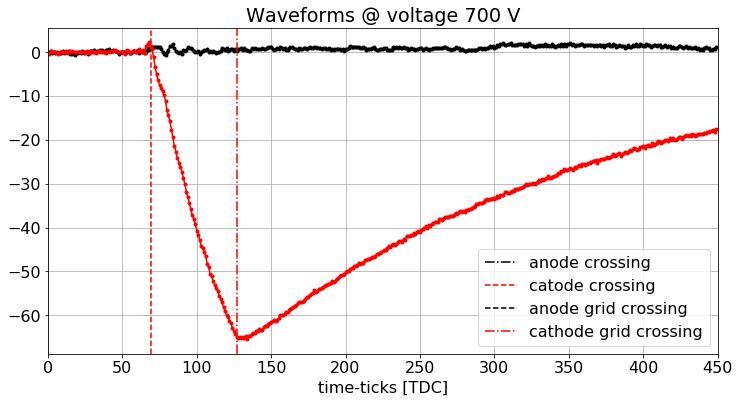

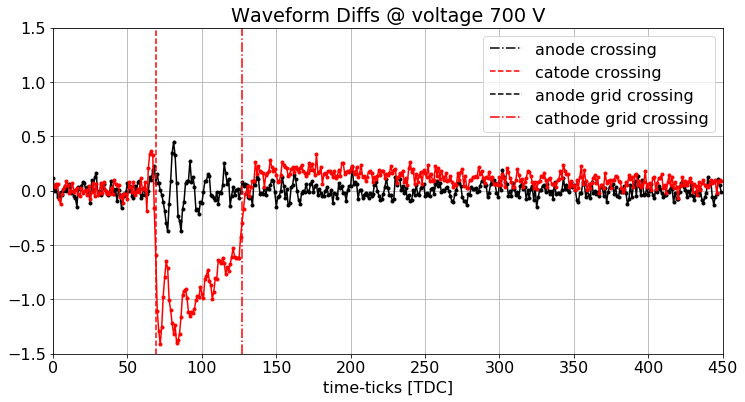

iteratio 5 with voltage 3000
('here voltage is ', 3000)


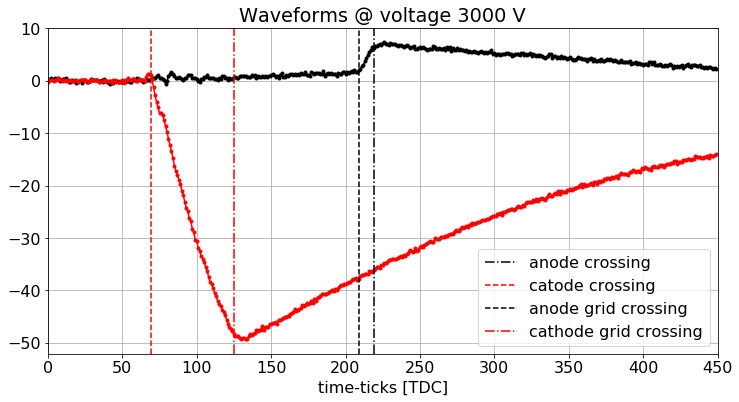

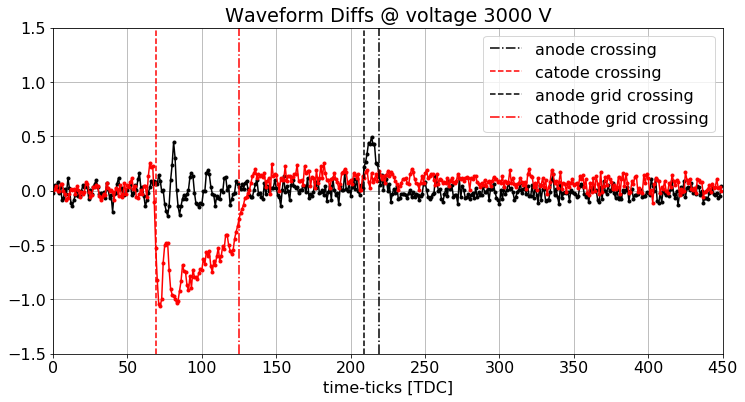

iteratio 6 with voltage 900
('here voltage is ', 900)


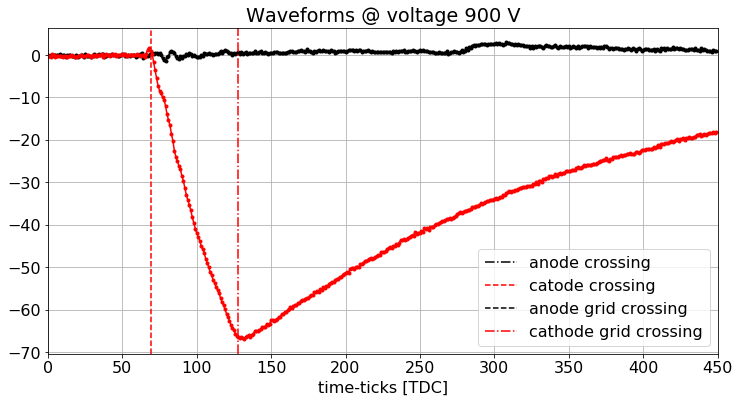

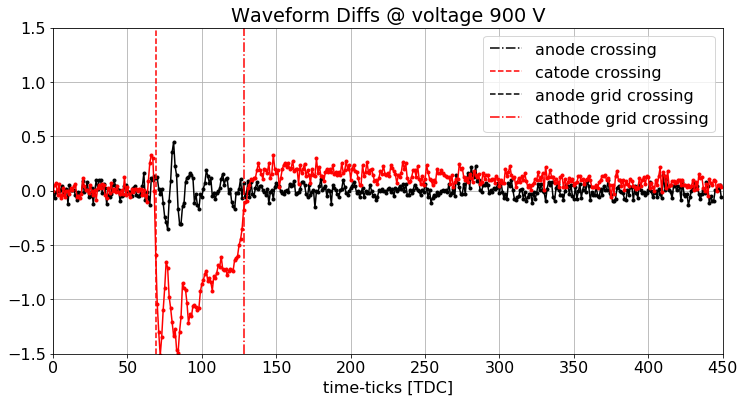

iteratio 7 with voltage 800
('here voltage is ', 800)


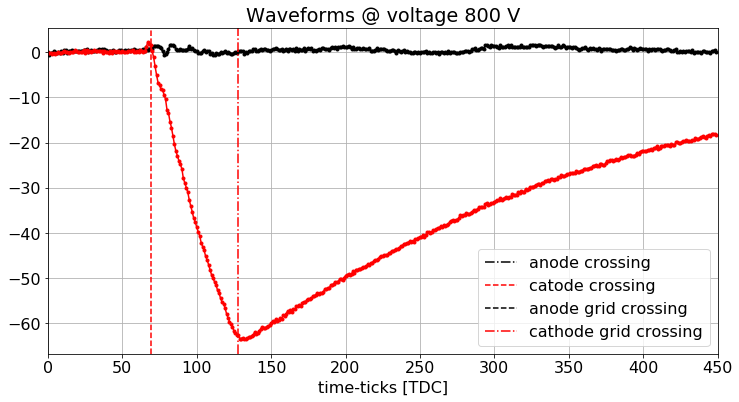

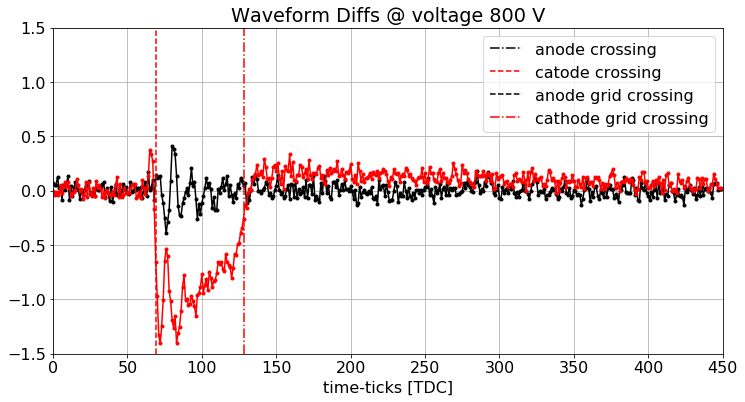

iteratio 8 with voltage 800
('here voltage is ', 800)


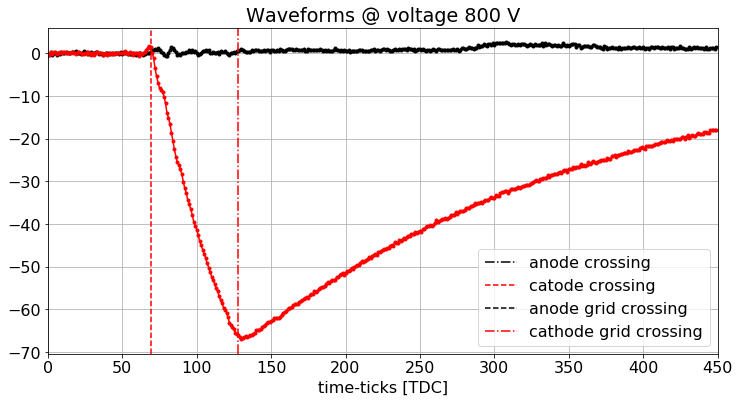

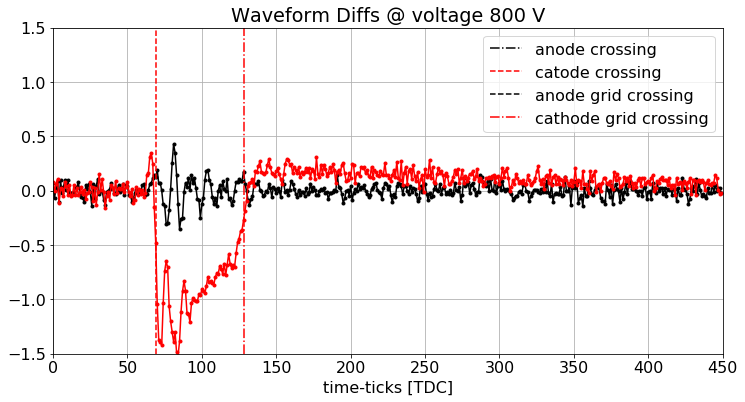

iteratio 9 with voltage 2000
('here voltage is ', 2000)


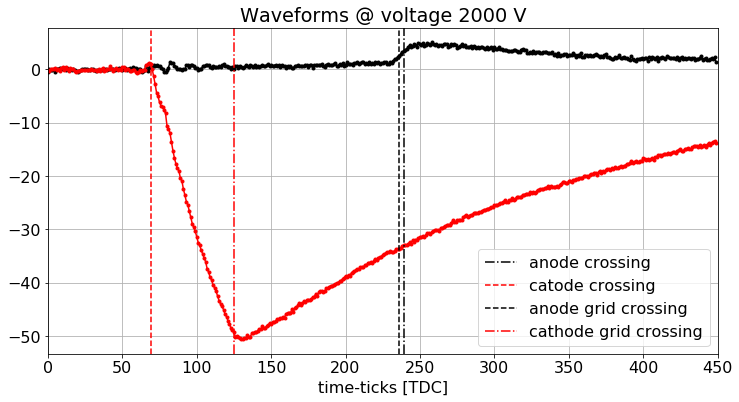

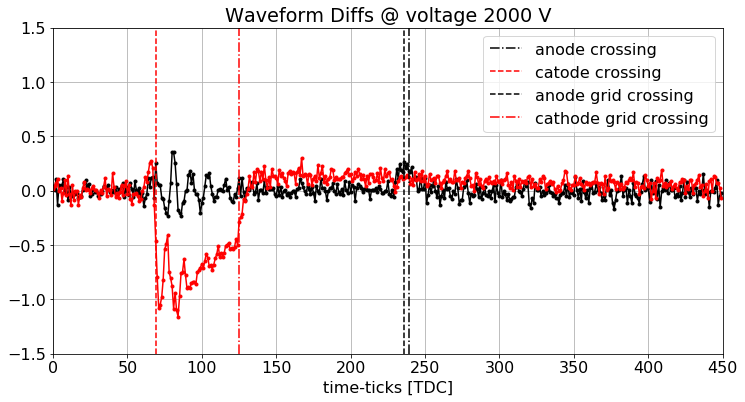

iteratio 10 with voltage 500
('here voltage is ', 500)


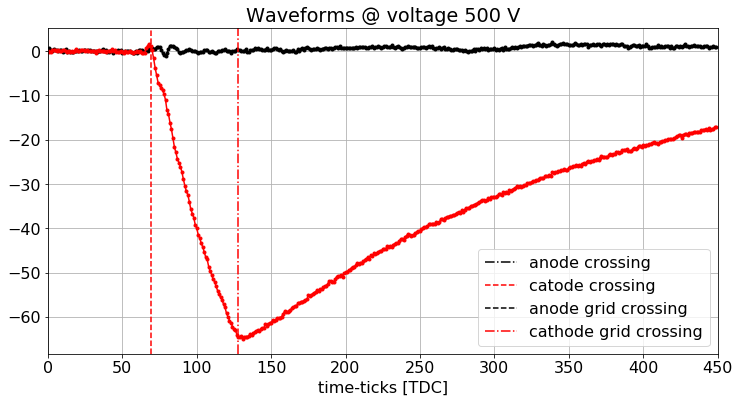

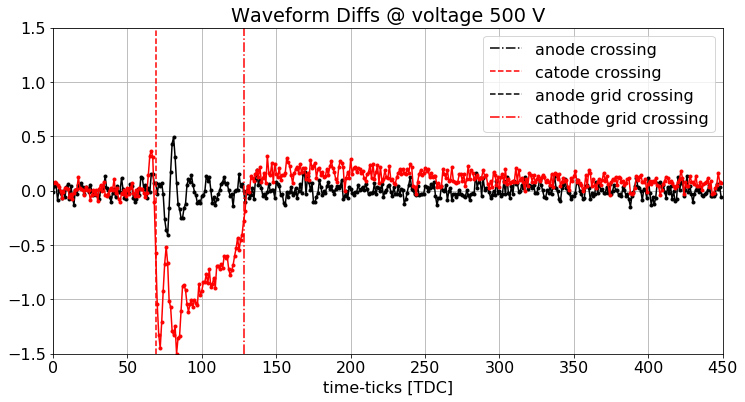

iteratio 11 with voltage 4000
('here voltage is ', 4000)


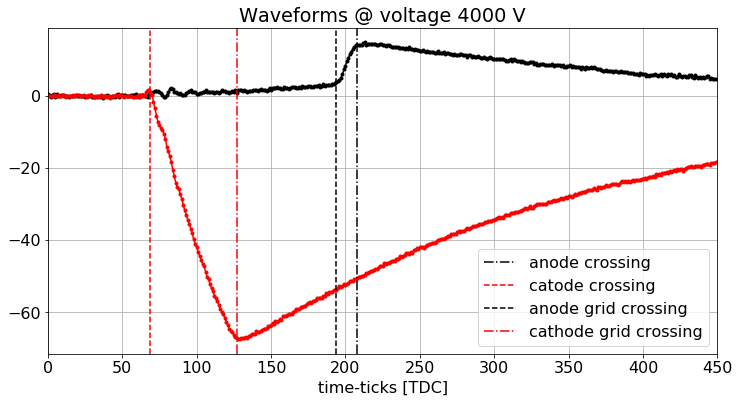

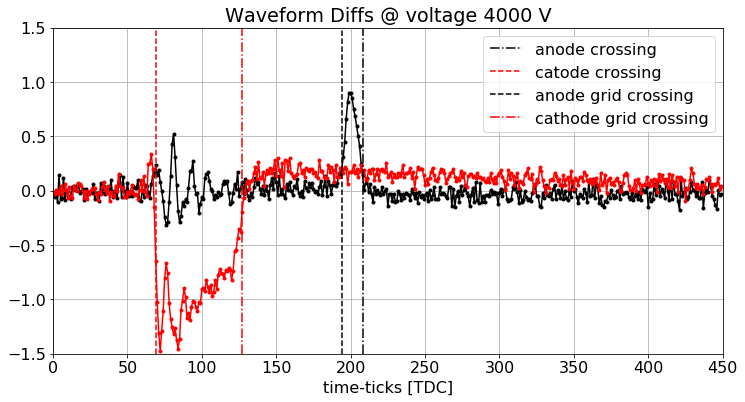

iteratio 12 with voltage 1000
('here voltage is ', 1000)


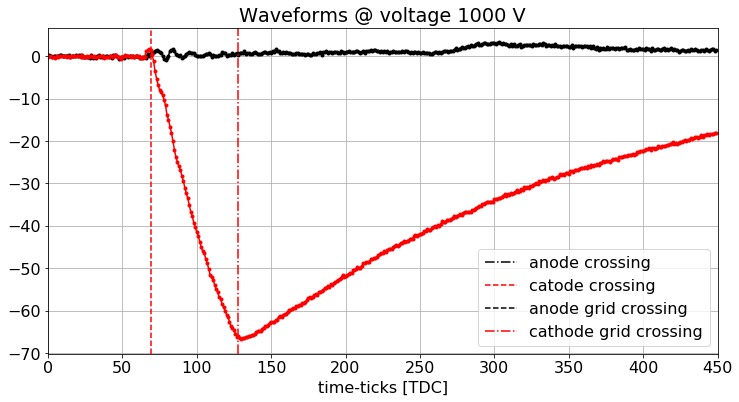

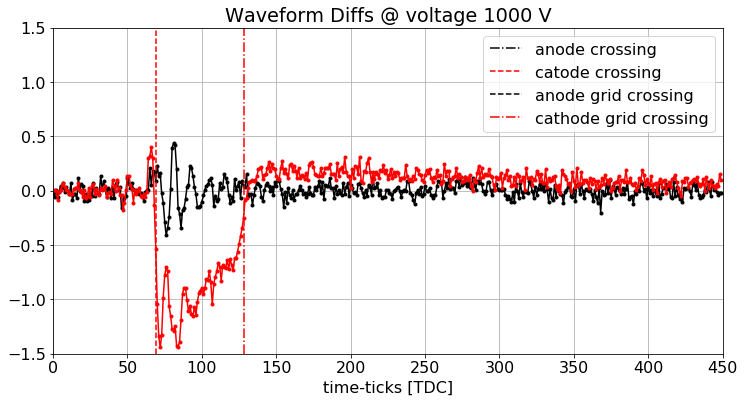

iteratio 13 with voltage 500
('here voltage is ', 500)


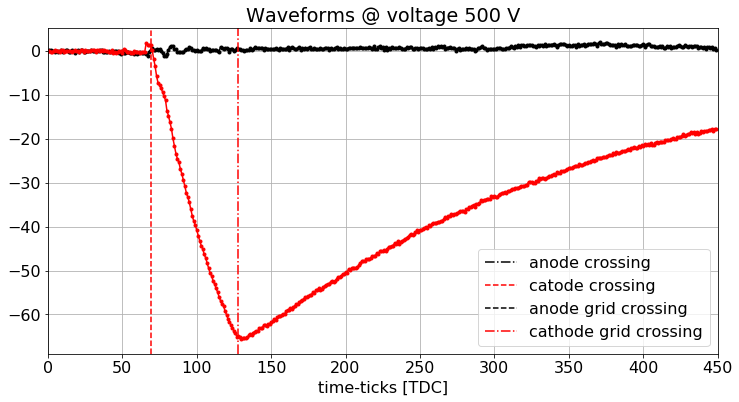

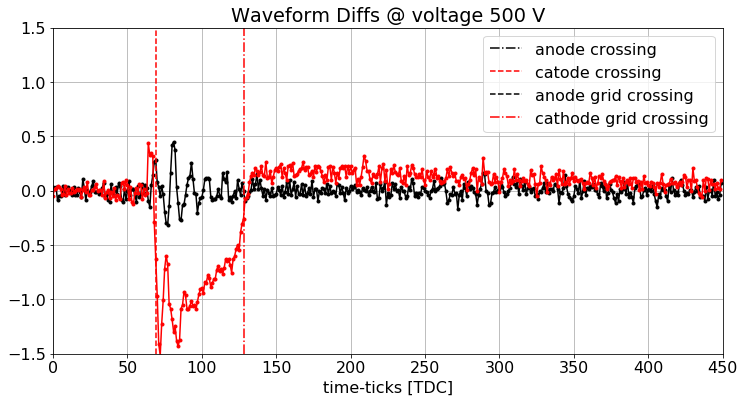

iteratio 14 with voltage 3000
('here voltage is ', 3000)


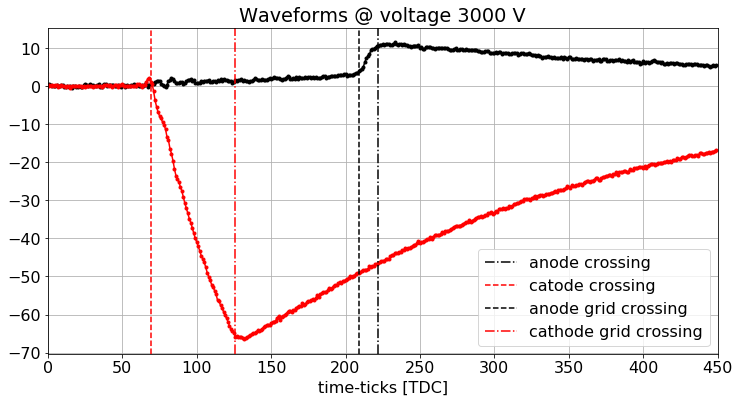

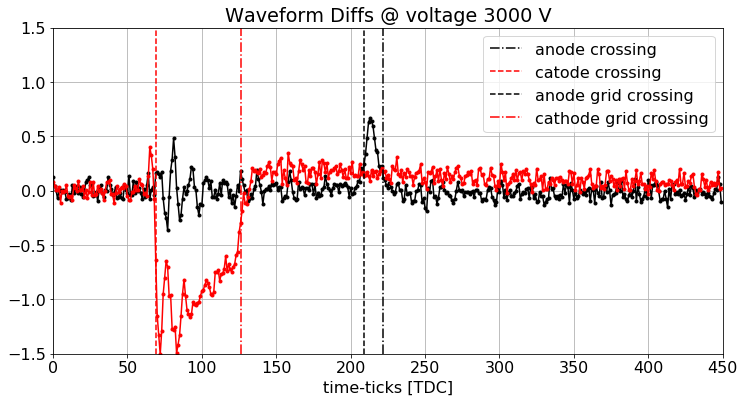

iteratio 15 with voltage 6000
('here voltage is ', 6000)


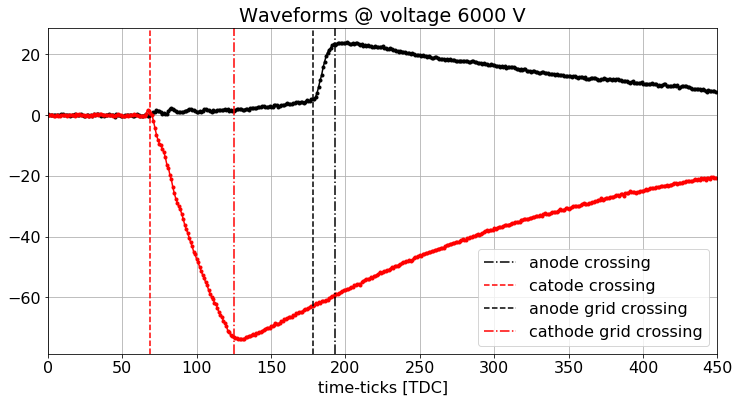

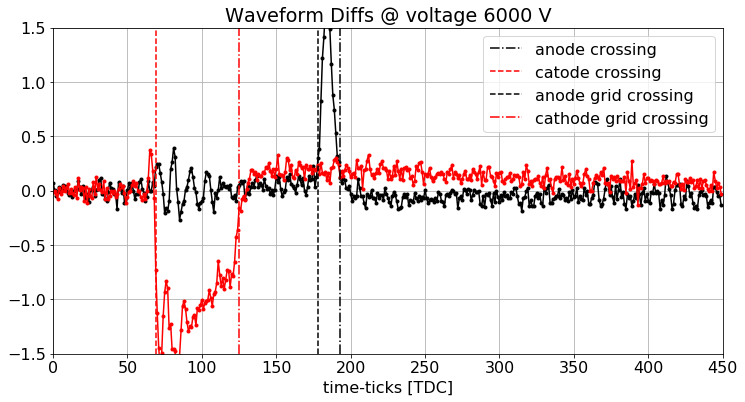

iteratio 16 with voltage 5000
('here voltage is ', 5000)


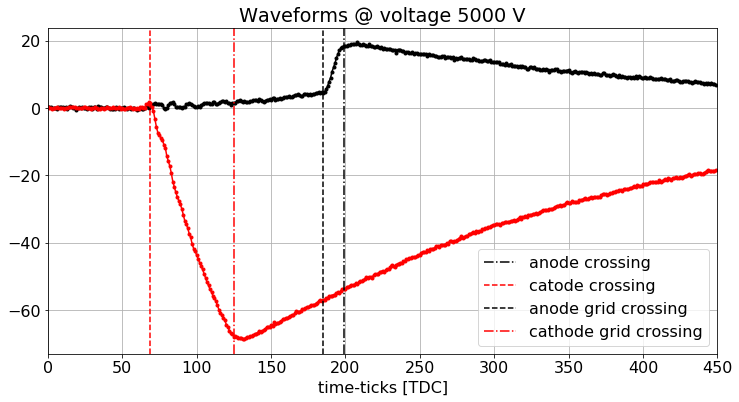

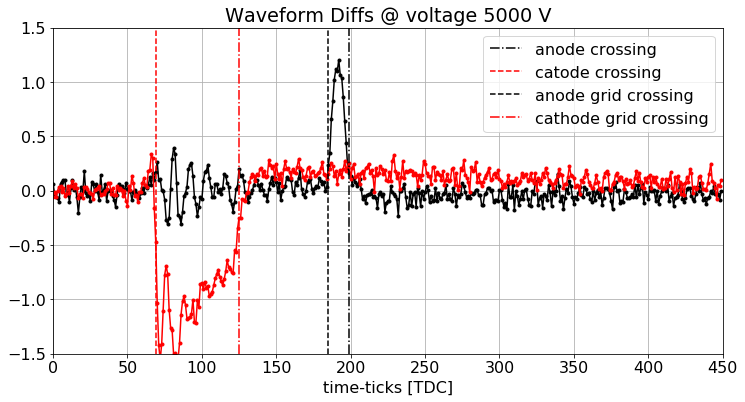

iteratio 17 with voltage 4000
('here voltage is ', 4000)


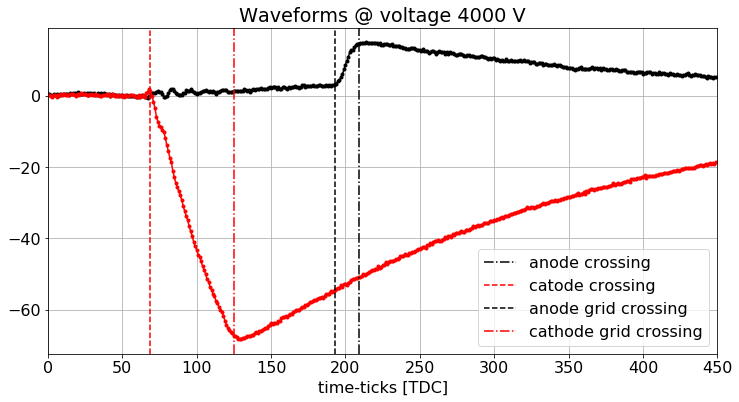

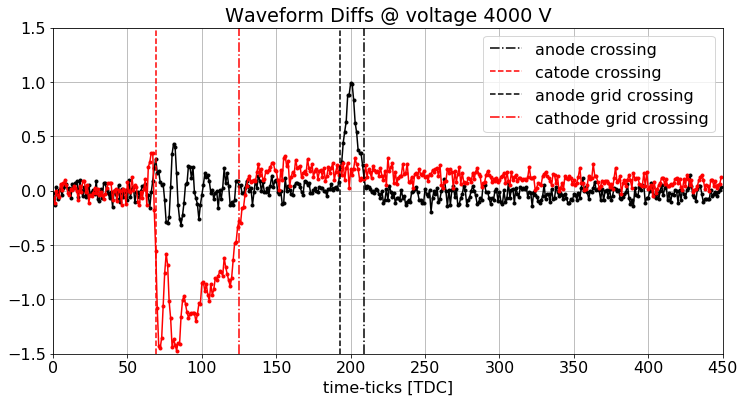

iteratio 18 with voltage 600
('here voltage is ', 600)


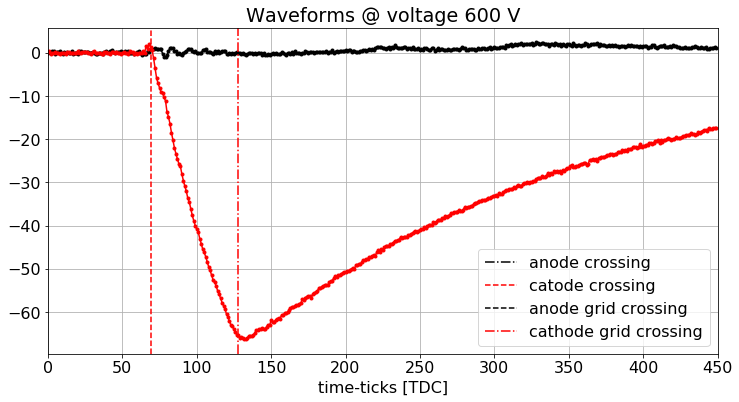

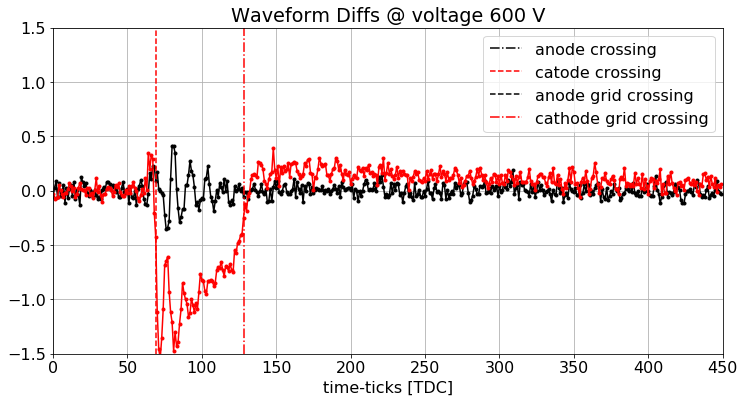

iteratio 19 with voltage 900
('here voltage is ', 900)


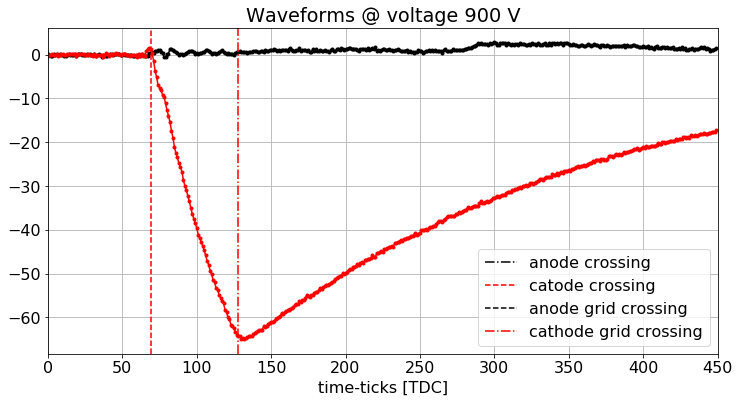

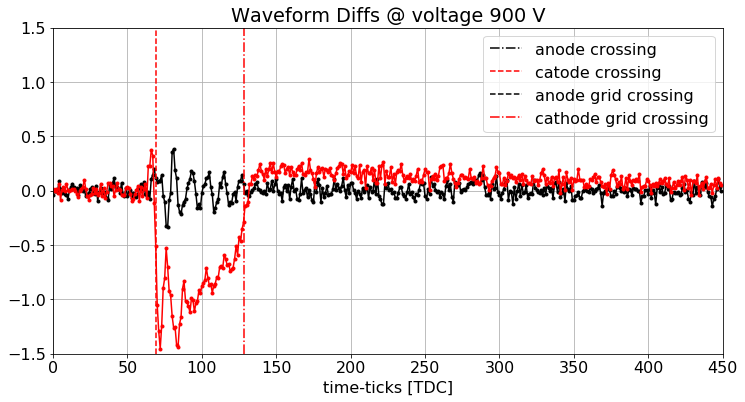

iteratio 20 with voltage 1000
('here voltage is ', 1000)


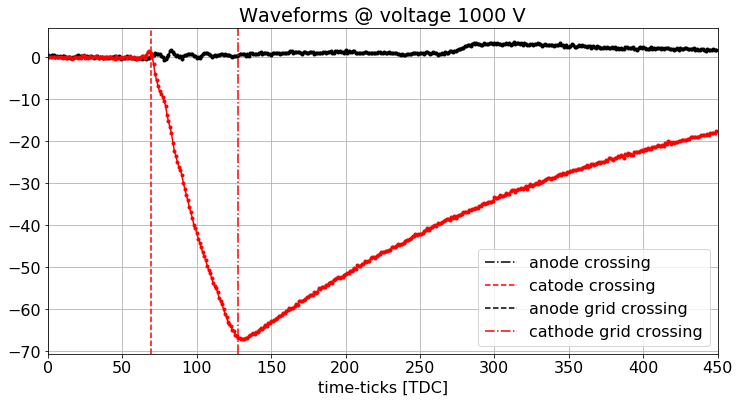

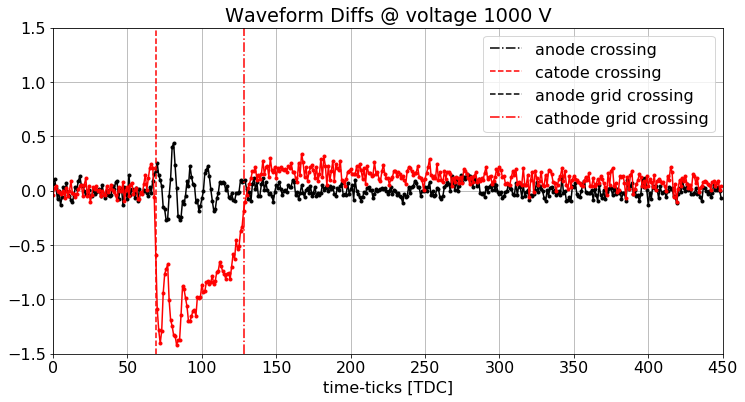

iteratio 21 with voltage 700
('here voltage is ', 700)


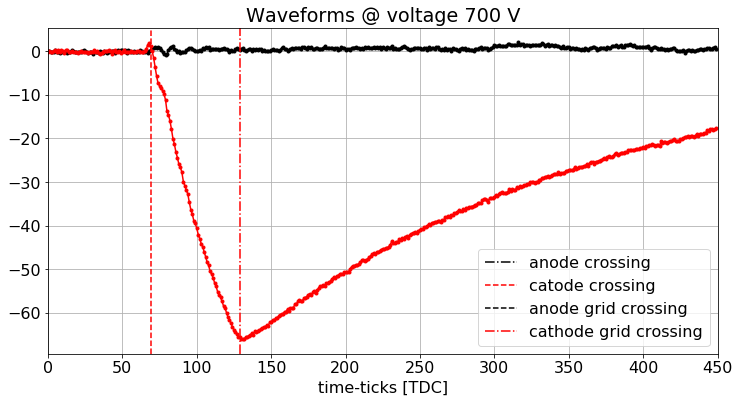

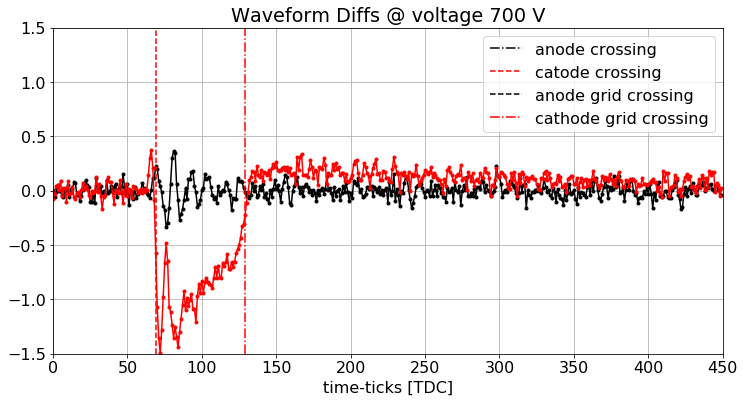

In [63]:
USEDMAP = {}

voltage_v = []
slope_v = []
AGcrossing_v = []
Acrossing_v = []
CGcrossing_v = []
Ccrossing_v = []

tmax_by_voltage = {}
AG_A_drift_by_voltage = {}
C_CG_drift_by_voltage = {}
CG_AG_drift_by_voltage = {}

ctr = 0
wfctr = 0

print('getting started...')

for i,voltage in enumerate(VOLTAGE_V):
    
    print('iteratio %i with voltage %i'%(i,voltage))
    
    USEDMAP[voltage] = 1
    
    waveformA = ALL_AVG_A_WF_V[i]
    waveformC = ALL_AVG_C_WF_V[i]
    
        
    mincathode = np.min(waveformC)
    waveformAR = waveformA#/(-mincathode)
    waveformAR = diffwf(waveformAR)
    waveformCR = diffwf(waveformC)
        
    # find C and CG crossings
    CGcrossing = 0
    Ccrossing = 0
    for tick in range(len(waveformCR)-1):
        if (tick < 220):
            continue
        ADC1 = waveformCR[tick]
        ADC2 = waveformCR[tick+1]
        if (Ccrossing == 0):
            if (ADC1 < -0.3 and ADC2 < -0.3):
                Ccrossing = tick
        elif (Ccrossing > 0 and CGcrossing == 0):
            if (ADC1 > -0.3 and ADC2 > -0.3):
                CGcrossing = tick
        else:
            break
                
    CGcrossing_v.append(CGcrossing)
    Ccrossing_v.append(Ccrossing)
    CCGtdrift = (CGcrossing - Ccrossing) * 0.5 # us

        
    if voltage in C_CG_drift_by_voltage.keys():
        C_CG_drift_by_voltage[voltage].append(CCGtdrift)
    else:
        C_CG_drift_by_voltage[voltage] = [CCGtdrift]


    
    # find AG and A crossings
    AGcrossing = 0
    Acrossing = 0
    
    for tick in range(len(waveformAR)-1):
        if (tick < CGcrossing):
            continue
        ADC1 = waveformAR[tick]
        ADC2 = waveformAR[tick+1]
        if (AGcrossing == 0):
            if (ADC1 > 0.2 and ADC2 > 0.2):
                AGcrossing = tick
        elif (AGcrossing > 0 and Acrossing == 0):
            if (ADC1 < 0.2 and ADC2 < 0.2):
                Acrossing = tick
        else:
            break
                
    AGcrossing_v.append(AGcrossing)
    Acrossing_v.append(Acrossing)
    AGAtdrift = (Acrossing - AGcrossing) * 0.5 # us
        
    if voltage in AG_A_drift_by_voltage.keys():
        AG_A_drift_by_voltage[voltage].append(AGAtdrift)
    else:
        AG_A_drift_by_voltage[voltage] = [AGAtdrift]

    # CG -> AG times   
    CGAGtdrift = (AGcrossing - CGcrossing) * 0.5
    if voltage in CG_AG_drift_by_voltage.keys():
        CG_AG_drift_by_voltage[voltage].append(CGAGtdrift)
    else:
        CG_AG_drift_by_voltage[voltage] = [CGAGtdrift]
        
    voltage_v.append(voltage)
        #slope_v.append(slope)
        
    print ('here voltage is ',voltage)
        
            
    
    # find peak tick of anode waveform
    tickmax = np.argmax(waveformAR)
    Tm = 350
    TM = 800

    fig = plt.figure(figsize=(12,6))
    plt.plot(waveformA[Tm:TM],color='k',marker='.')#,label='Cathode',alpha=0.5)
    plt.plot(waveformC[Tm:TM],color='r',marker='.')#,label='%i Volts'%voltage)#,label='Cathode',alpha=0.5)
    plt.axvline(Acrossing-Tm,linestyle='-.',color='k',label='anode crossing')
    plt.axvline(Ccrossing-Tm,linestyle='--',color='r',label='catode crossing')
    plt.axvline(AGcrossing-Tm,linestyle='--',color='k',label='anode grid crossing')
    plt.axvline(CGcrossing-Tm,linestyle='-.',color='r',label='cathode grid crossing')
    plt.grid()
    plt.legend()
    plt.xlim([0,TM-Tm])
    plt.xlabel('time-ticks [TDC]')
    plt.title('Waveforms @ voltage %i V'%voltage)
    plt.show()
    
    fig = plt.figure(figsize=(12,6))
    plt.plot(waveformAR[Tm:TM],color='k',marker='.')#,label='Cathode',alpha=0.5)
    plt.plot(waveformCR[Tm:TM],color='r',marker='.')#,label='%i Volts'%voltage)#,label='Cathode',alpha=0.5)
    plt.axvline(Acrossing-Tm,linestyle='-.',color='k',label='anode crossing')
    plt.axvline(Ccrossing-Tm,linestyle='--',color='r',label='catode crossing')
    plt.axvline(AGcrossing-Tm,linestyle='--',color='k',label='anode grid crossing')
    plt.axvline(CGcrossing-Tm,linestyle='-.',color='r',label='cathode grid crossing')
    plt.grid()
    plt.legend()
    plt.ylim([-1.5,1.5])
    plt.xlim([0,TM-Tm])
    plt.xlabel('time-ticks [TDC]')
    plt.title('Waveform Diffs @ voltage %i V'%voltage)
    plt.show()
    
    ctr += 1


[1.17647059 1.76470588 2.05882353 2.35294118 2.94117647 3.52941176]


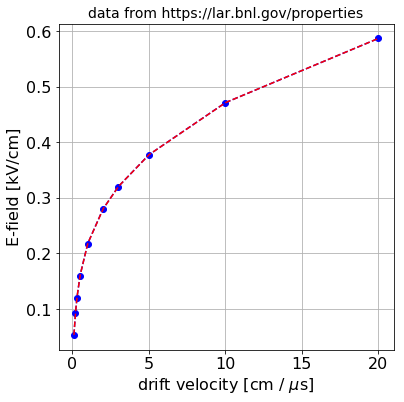

In [64]:
from scipy import interpolate

FIELD_V = [0.1,0.2,0.3,0.5,1.0,2.0,3.0,5.0,10.,20]
VEL_V = [0.0533,0.0922,0.1206,0.1601,0.2175,0.2797,0.320,0.3773,0.4710,0.5865]


fig = plt.figure(figsize=(6,6))
field_v = np.array([2,3,3.5,4,5,6])
dist = 1.7 # cm
VperCM = field_v/dist
print field_v/dist
drift_v = [0.2405,0.2794,0.2946,0.3081,0.3315,0.3514]
#plt.plot(VperCM,drift_v,'bo--')
plt.plot(FIELD_V,VEL_V,'bo--')

#func = interpolate.interp1d(VperCM,drift_v)
#xvals = np.arange(VperCM[0],VperCM[-1],0.1)
func2 = interpolate.interp1d(FIELD_V,VEL_V)
xvals = np.arange(FIELD_V[0],FIELD_V[-1],0.01)
yvals = func2(xvals)
plt.plot(xvals,yvals,'r--')

plt.grid()
plt.ylabel('E-field [kV/cm]')
plt.xlabel(r'drift velocity [cm / $\mu$s]')
plt.title('data from https://lar.bnl.gov/properties',fontsize=14)
plt.show()

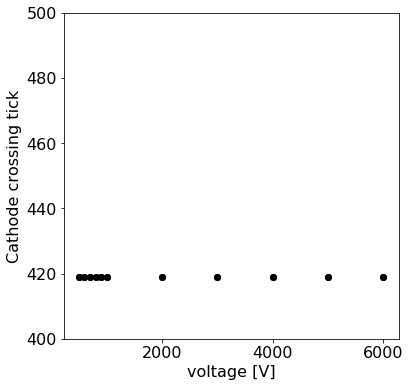

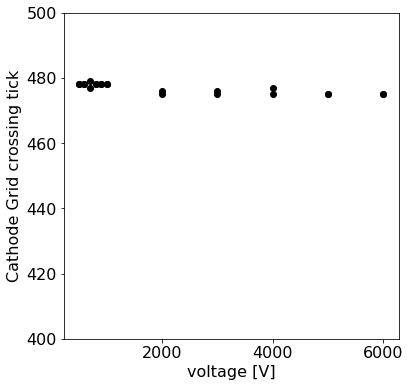

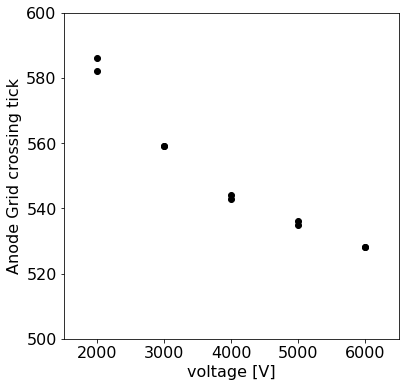

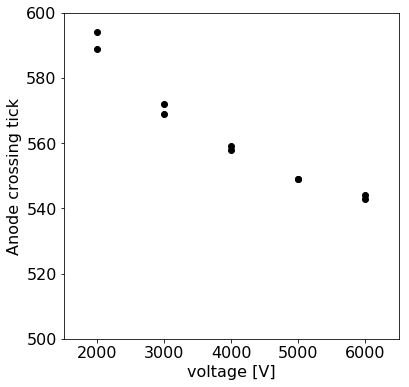

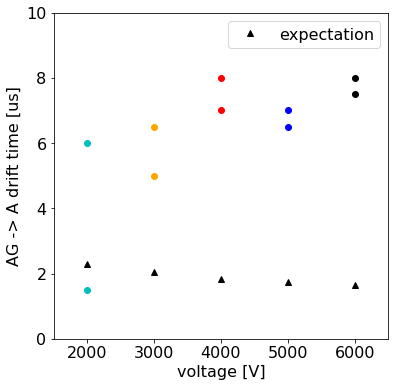

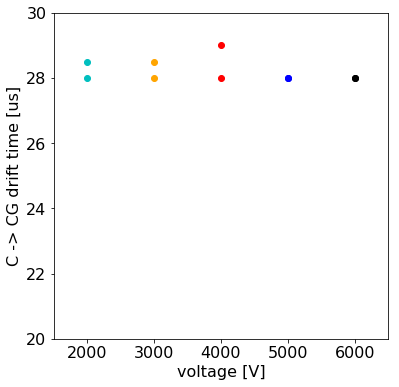

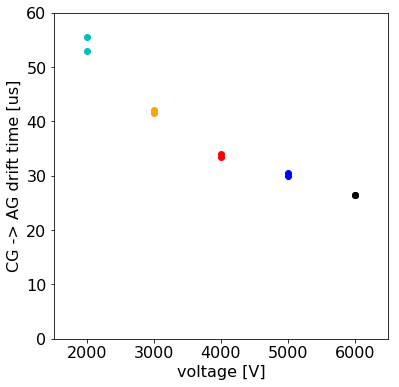

In [67]:
#fig = plt.figure(figsize=(6,6))
#plt.plot(voltage_v,slope_v,'ko')
#plt.xlabel('voltage [V]')
#plt.ylabel('Waveform Rise Slope [A.U.]')
#plt.show()

DIST_AG_A = 0.85
DIST_C_CG = 1.7
DIST_CG_AG = 0.85*3

fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,Ccrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Cathode crossing tick')
plt.ylim([400,500])
plt.show()
fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,CGcrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Cathode Grid crossing tick')
plt.ylim([400,500])
plt.show()
fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,AGcrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Anode Grid crossing tick')
plt.xlim([1500,6500])
plt.ylim([500,600])
plt.show()
fig = plt.figure(figsize=(6,6))
plt.plot(voltage_v,Acrossing_v,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('Anode crossing tick')
plt.xlim([1500,6500])
plt.ylim([500,600])
plt.show()

AGcrossing_v = np.array(AGcrossing_v)
Acrossing_v = np.array(Acrossing_v)
TDriftA = (Acrossing_v - AGcrossing_v) #* 0.5

fig = plt.figure(figsize=(6,6))
ctr = 0
efield_v = []
efield_raw_v = []
for key,vals in AG_A_drift_by_voltage.items():
    efield_v.append(key/1000./(DIST_AG_A/2.))
    efield_raw_v.append(key)
    #print (' there are %i measurement for voltage %i'%(len(v),key))
    #print (v)
    for v in vals:
        plt.plot(key,v,'o',color=COLORMAP[key],lw=2)
driftvel_v = func2(efield_v)
efield_v = np.array(efield_v) * 1000.
drifttime_v_AG_A = DIST_AG_A / driftvel_v 
plt.plot(efield_raw_v,drifttime_v_AG_A,'k^',label='expectation')
#plt.plot(efield_v,drifttime_v_AG_A,'ko',label='8 mm AG -> A dist')
plt.xlabel('voltage [V]')
plt.ylabel('AG -> A drift time [us]')
plt.xlim([1500,6500])
plt.ylim([0,10])
plt.legend()
plt.show()


fig = plt.figure(figsize=(6,6))
ctr = 0
for key,vals in C_CG_drift_by_voltage.items():
    for v in vals:
        plt.plot(key,v,'o',color=COLORMAP[key],lw=2)
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('C -> CG drift time [us]')
plt.xlim([1500,6500])
plt.ylim([20,30])
plt.show()

fig = plt.figure(figsize=(6,6))
ctr = 0
for key,vals in CG_AG_drift_by_voltage.items():
    for v in vals:
        plt.plot(key,v,'o',color=COLORMAP[key],lw=2)
#plt.plot(voltage_v,TDriftA,'ko')
plt.xlabel('voltage [V]')
plt.ylabel('CG -> AG drift time [us]')
plt.xlim([1500,6500])
plt.ylim([0,60])
plt.show()